In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [21]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
obj_cols = df.select_dtypes(exclude=np.number).columns

for col in obj_cols:
    print(f'{df[col].value_counts()}\n\n')

mainroad
yes    468
no      77
Name: count, dtype: int64


guestroom
no     448
yes     97
Name: count, dtype: int64


basement
no     354
yes    191
Name: count, dtype: int64


hotwaterheating
no     520
yes     25
Name: count, dtype: int64


airconditioning
no     373
yes    172
Name: count, dtype: int64


prefarea
no     417
yes    128
Name: count, dtype: int64


furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64




In [24]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


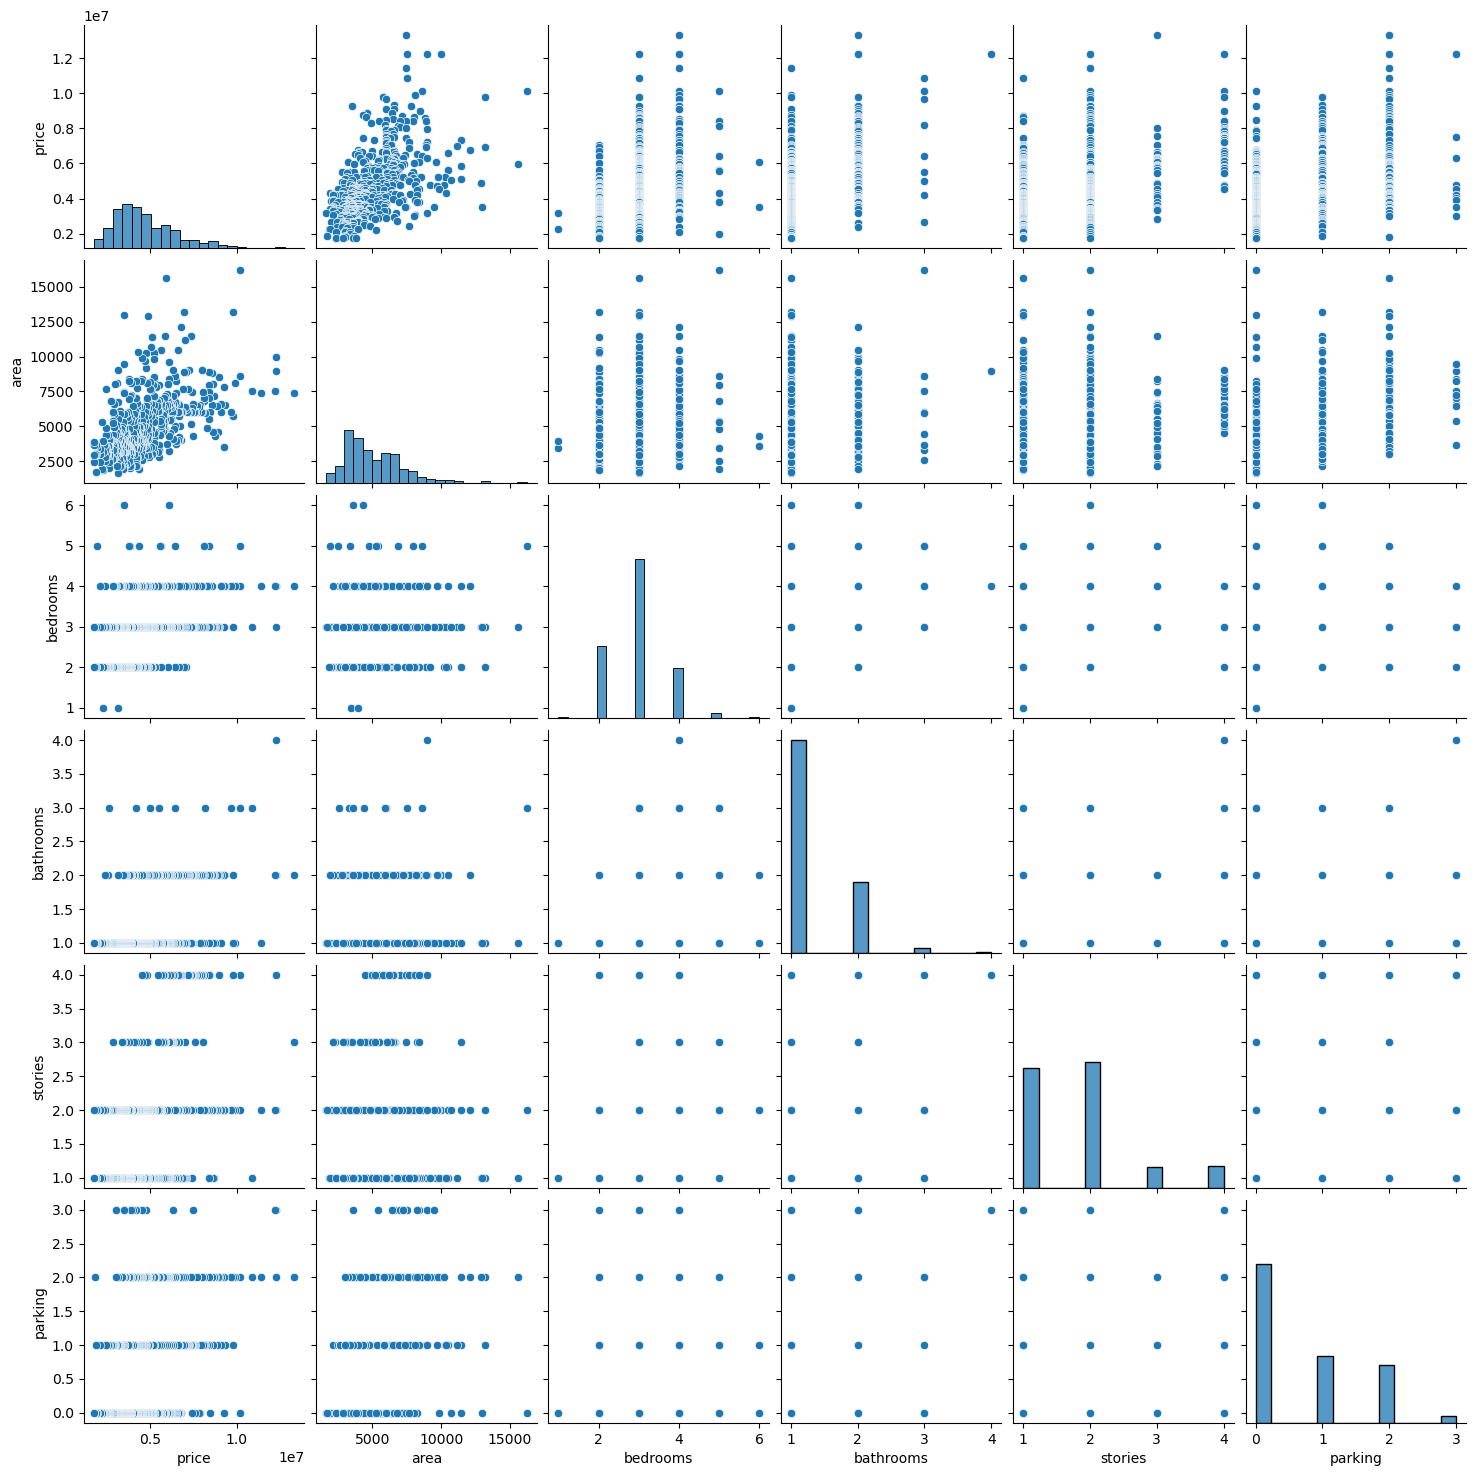

In [26]:
sn.pairplot(df)

In [27]:
df[['price', 'area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


<Figure size 1800x2400 with 0 Axes>

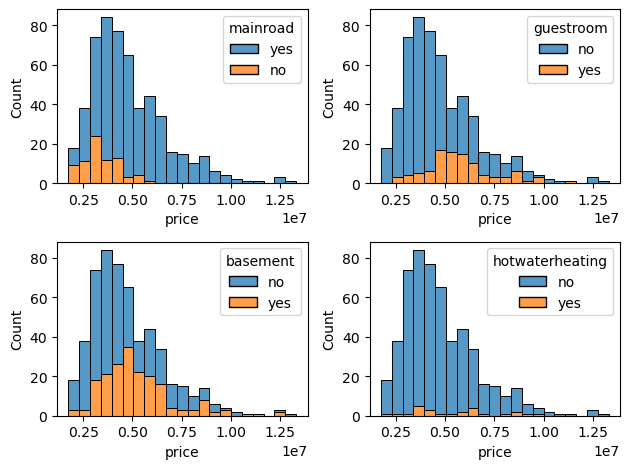

In [28]:
plt.figure(figsize=(18, 24))
plt.subplots(2, 2)

# (1, 1; 2, 1;, 3, 1;, 4, 1)

for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.histplot(x='price', hue=obj_cols[i], data=df, label=obj_cols[i], multiple='stack', element='bars')
    
plt.tight_layout()
plt.show()

<Figure size 1800x2400 with 0 Axes>

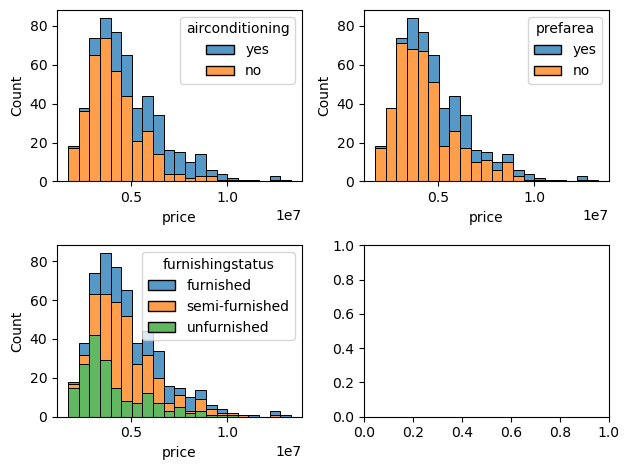

In [29]:
plt.figure(figsize=(18, 24))
plt.subplots(2, 2)


for i in range(3):
    plt.subplot(2, 2, i+1)
    sns.histplot(x='price', hue=obj_cols[i+4], data=df, multiple='stack', element='bars')
    
plt.tight_layout()
plt.show()

<Axes: >

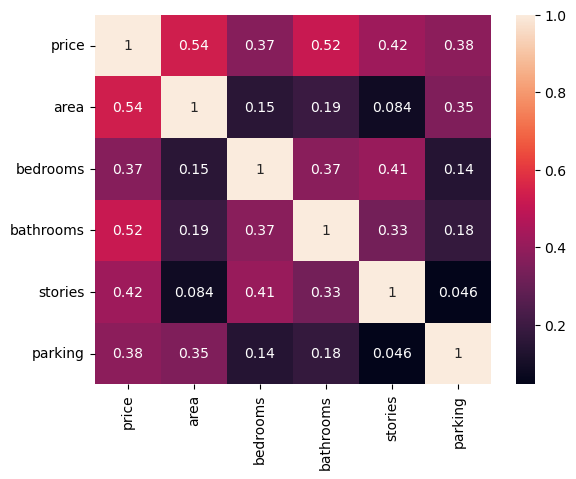

In [30]:
int_cols = df.select_dtypes(include=np.number).columns

sns.heatmap(df[int_cols].corr(), annot=True)

# model building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [32]:
for col in obj_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [33]:
for col in obj_cols:
    print(f'{df[col].value_counts()}\n\n')

mainroad
1    468
0     77
Name: count, dtype: int64


guestroom
0    448
1     97
Name: count, dtype: int64


basement
0    354
1    191
Name: count, dtype: int64


hotwaterheating
0    520
1     25
Name: count, dtype: int64


airconditioning
0    373
1    172
Name: count, dtype: int64


prefarea
0    417
1    128
Name: count, dtype: int64


furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64




In [34]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
import pickle

pickle.dump(scaler, open('scaler.sav', 'wb'))

In [37]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train) 

In [38]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [39]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [40]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [41]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge()

In [42]:


rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

# Model Evaluation

In [44]:
models = [lr, rfr, lasso, ridge, gbr, svr]
mses = []

for model in models:
    pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, pred)
    print(f'{model}: \t\t{mse}')
    mses.append(mse)

LinearRegression(): 		1165219865149.1343
RandomForestRegressor(): 		1446292458505.0498
Lasso(): 		1165220082482.2678
Ridge(): 		1164610740732.8342
GradientBoostingRegressor(): 		1100796035125.034
SVR(): 		2782331383929.4243


In [45]:
np.min(mses)

1100796035125.034

In [46]:
pickle.dump(lr, open('linreg.pkl', 'wb'))

In [47]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [48]:
lr.predict(scaler.transform([[7420, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2]]))[0]

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4411778.9961993825